In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("train_dataset_latest/sleepy/s0001_01627_0_1_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

In [3]:
print(img_array) 

[[ 78  79  79 ... 117 118 119]
 [ 77  79  78 ... 122 120 117]
 [ 76  77  77 ... 119 118 116]
 ...
 [ 88  89  90 ...  99  99  98]
 [ 89  90  92 ...  96  95  95]
 [ 90  91  91 ...  96  95  95]]


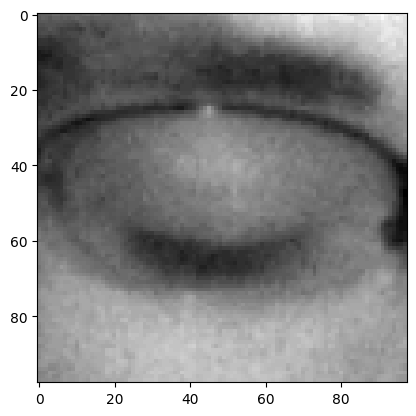

In [4]:
plt.imshow(img_array,cmap ="gray")


In [5]:
img_array.shape

(98, 98)

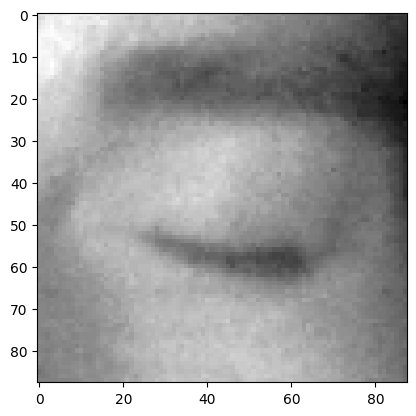

In [6]:
Datadirectory = "train_dataset_latest/"
Classes = ["sleepy", "awake"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

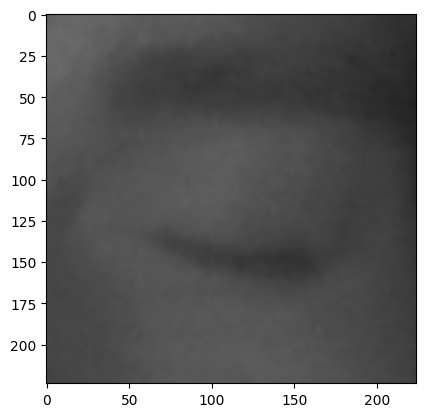

In [7]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Reading all the images and converting them into an array for data and labels

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

632


In [11]:
import random

random.shuffle(training_Data)

In [12]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(632, 224, 224, 3)

In [14]:
X = X/255.0 #normalize the data

In [15]:
Y = np.array(y)

In [16]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Deep learning model for training

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Transfer Learning

In [20]:
base_input = model.input ## input

In [21]:
print(base_input) 

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>


In [22]:
base_output = model.layers[-4].output

In [23]:
print(base_output)

<KerasTensor shape=(None, 1, 1, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_87>


In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node(1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Settings for binary classification (awake/sleepy)

In [27]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
new_model.fit(X,Y, epochs = 25, validation_split = 0.1) ##training

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 153s 6s/step - accuracy: 0.8820 - loss: 0.1960 - val_accuracy: 0.4688 - val_loss: 33.7526
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.9958 - loss: 0.0070 - val_accuracy: 0.4688 - val_loss: 31.9341
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 1.0000 - loss: 3.2383e-04 - val_accuracy: 0.4688 - val_loss: 34.9726
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 1.0000 - loss: 1.2612e-05 - val_accuracy: 0.4688 - val_loss: 31.6598
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 1.0000 - loss: 3.0023e-04 - val_accuracy: 0.4688 - val_loss: 29.2816
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 1.0000 - loss: 1.0411e-05 - val_accuracy: 0.4688 - val_loss: 24.3311
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 1.0000 - loss: 3.9474e-04 - val_accuracy: 0.4688 - val_loss: 25.8627
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.9937 - loss: 0.0149

In [46]:
new_model.save('my_model.keras')

In [47]:
new_model = tf.keras.models.load_model('my_model.keras',compile = False)

# Checking the network for predictions

In [48]:
img_array = cv2.imread('s0014_07296_0_0_1_1_1_02.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size, img_size))

In [49]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [50]:
X_input.shape

(1, 224, 224, 3)

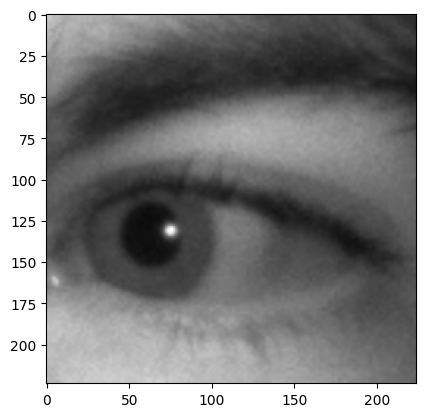

In [51]:
plt.imshow(new_array)

In [52]:
X_input = X_input/255.0

In [53]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [54]:
prediction

array([[0.99475473]], dtype=float32)

In [55]:
img_array = cv2.imread('s0005_00187_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size, img_size))

In [56]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

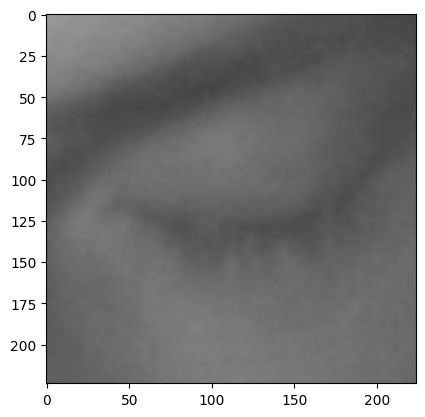

In [57]:
plt.imshow(new_array)

In [58]:
X_input = X_input/255.0


In [59]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [60]:
prediction

array([[4.7200327e-10]], dtype=float32)

# Check on unknown images

In [71]:
img = cv2.imread('color_img.jpeg')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[161 160 170]
  [159 158 168]
  [157 156 166]
  ...
  [158 156 168]
  [154 152 164]
  [151 149 161]]

 [[161 160 170]
  [159 158 168]
  [157 156 166]
  ...
  [157 155 167]
  [153 151 163]
  [150 148 160]]

 [[161 160 170]
  [158 157 167]
  [156 155 165]
  ...
  [156 154 166]
  [153 151 163]
  [150 148 160]]]


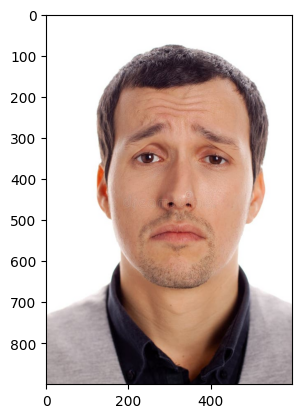

In [72]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [73]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [74]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [75]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [76]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [77]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

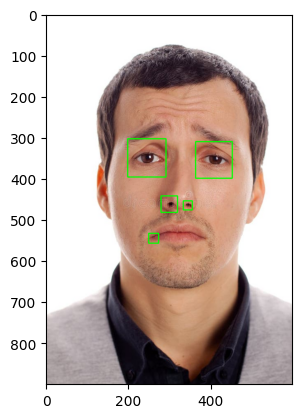

In [78]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping the eye image

5 eyes detected


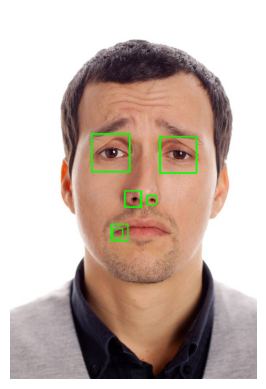

In [80]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

if len(eyes) == 0:
    print("Eyes are not detected.")
else:
    print(f"{len(eyes)} eyes detected")
    for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

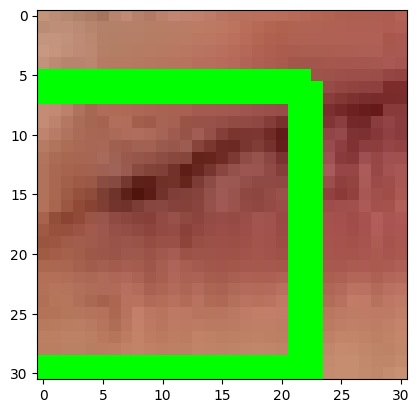

In [87]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [88]:
eyes_roi.shape

(31, 31, 3)

In [89]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [90]:
final_image.shape

(1, 224, 224, 3)

In [91]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[1.]], dtype=float32)

# Realtime Video Demo

## First Detect that eyes are closed on open

In [2]:
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#cap = cv2.VideoCapture(1)
#if not cap.isOpened():
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0.1):
        status = "Awake"
    else:
        status: "Sleepy"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y), (x+w, y+h), (0,255,0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, status,(50,50), font, 3, 2, cv2.LINE_4)

    cv2.imshow("Drawsiness detection Tutorial", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

NameError: name 'new_model' is not defined